In [3]:
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [103]:
df = pd.read_csv("all_songs_attributes.csv")
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,200598.000000,200598.000000,200598.000000,200598.000000,200598.000000,200598.000000,200598.000000,200598.000000,200598.000000,2.005980e+05
mean,0.577042,0.573808,-9.888378,0.102159,0.342508,0.211696,0.191263,0.451478,119.430718,2.188385e+05
std,0.188885,0.264275,6.659622,0.114437,0.346237,0.354110,0.164091,0.259999,30.194909,1.397150e+05
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.203000e+03
25%,0.458000,0.398000,-11.730000,0.037800,0.030500,0.000000,0.096900,0.235000,95.997000,1.688000e+05
50%,0.598000,0.611000,-7.845000,0.052900,0.202000,0.000132,0.122000,0.437000,120.004000,2.055000e+05
75%,0.720000,0.786000,-5.570000,0.110000,0.640000,0.320000,0.231000,0.654000,139.333750,2.454540e+05
max,0.996000,1.000000,1.806000,0.966000,0.996000,1.000000,0.999000,1.000000,249.983000,6.000661e+06


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200599 entries, 0 to 200598
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      200598 non-null  float64
 1   energy            200598 non-null  float64
 2   loudness          200598 non-null  float64
 3   speechiness       200598 non-null  float64
 4   acousticness      200598 non-null  float64
 5   instrumentalness  200598 non-null  float64
 6   liveness          200598 non-null  float64
 7   valence           200598 non-null  float64
 8   tempo             200598 non-null  float64
 9   id                200598 non-null  object 
 10  duration_ms       200598 non-null  float64
dtypes: float64(10), object(1)
memory usage: 16.8+ MB


In [105]:
df.dropna(axis = 0, inplace = True)

In [106]:
df.set_index('id', inplace=True)
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
5CQHTuNbYlEA4fZdxQ4PMi,0.585,0.239,-15.167,0.0309,0.697,0.001330,0.159,0.0933,101.182,207520.0
3LHg768dEKqJKht2uPTlVR,0.463,0.368,-11.546,0.0480,0.376,0.000000,0.149,0.7500,141.974,179960.0
3bHhUEOTIbezeZ856R0BX5,0.561,0.327,-10.835,0.0327,0.902,0.000469,0.111,0.2980,161.858,236307.0
2hKdd3qO7cWr2Jo0Bcs0MA,0.481,0.638,-5.862,0.0276,0.153,0.000000,0.154,0.4970,79.064,259933.0
615auKcis6sGDrHk6UTeog,0.643,0.495,-10.176,0.0292,0.421,0.001230,0.082,0.3190,127.219,235000.0


In [107]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
5CQHTuNbYlEA4fZdxQ4PMi,0.585,0.239,-15.167,0.0309,0.697,0.001330,0.159,0.0933,101.182,207520.0
3LHg768dEKqJKht2uPTlVR,0.463,0.368,-11.546,0.0480,0.376,0.000000,0.149,0.7500,141.974,179960.0
3bHhUEOTIbezeZ856R0BX5,0.561,0.327,-10.835,0.0327,0.902,0.000469,0.111,0.2980,161.858,236307.0
2hKdd3qO7cWr2Jo0Bcs0MA,0.481,0.638,-5.862,0.0276,0.153,0.000000,0.154,0.4970,79.064,259933.0
615auKcis6sGDrHk6UTeog,0.643,0.495,-10.176,0.0292,0.421,0.001230,0.082,0.3190,127.219,235000.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.042134,-1.266894,-0.792633,-0.622688,1.023844,-0.594070,-0.196616,-1.377615,-0.604366,-0.081012
1,-0.603764,-0.778765,-0.248907,-0.473261,0.096731,-0.597825,-0.257558,1.148170,0.746594,-0.278271
2,-0.084928,-0.933907,-0.142144,-0.606959,1.615926,-0.596501,-0.489137,-0.590302,1.405117,0.125030
3,-0.508468,0.242901,0.604597,-0.651525,-0.547338,-0.597825,-0.227087,0.175087,-1.336875,0.294132
4,0.349200,-0.298204,-0.043189,-0.637543,0.226701,-0.594352,-0.665868,-0.509533,0.257934,0.115675


## Chosing K

### elbow method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

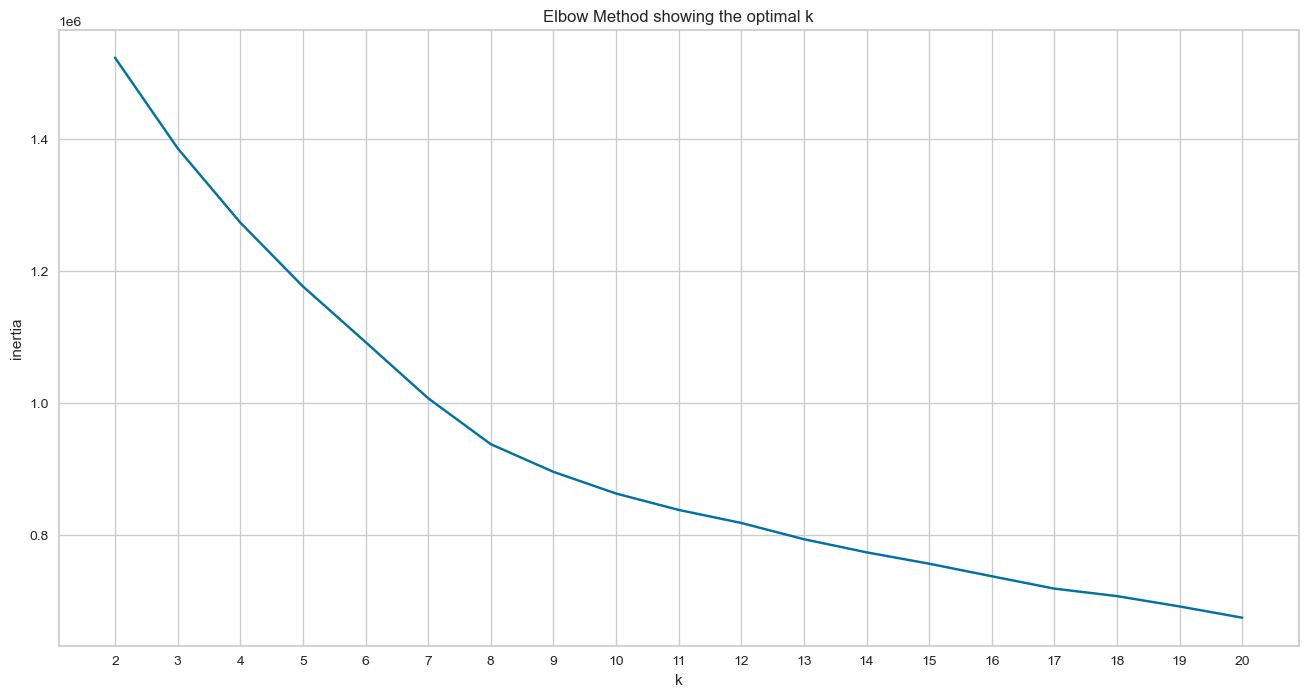

In [108]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [21]:
inertia

[8466.557324695728,
 7614.516436170389,
 6855.662841299264,
 6208.552214719935,
 5762.219586053116,
 5418.8114019469795,
 5180.719763672892,
 4945.59081124905,
 4807.137253436125,
 4650.113337152811,
 4526.1752232502395,
 4434.0188426927925,
 4338.433858376366,
 4232.303378622379,
 4157.045208145262,
 4082.9104027508174,
 4012.8573732215154,
 3931.0949687427224,
 3872.294025016796]

## Silouhette

In [109]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

MemoryError: Unable to allocate 1.00 GiB for an array with shape (669, 200598) and data type float64

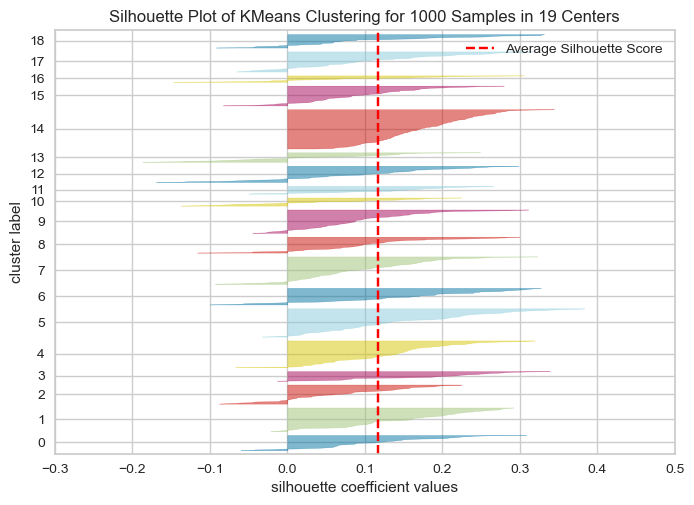

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
#another representaitron of silhouhette plot: 
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(k, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from prince import PCA
from hcpc import HCPC

In [47]:
# Standardize the data
X = StandardScaler().fit_transform(df)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)

NameError: name 'PCA' is not defined

In [ ]:
# Perform HCPC clustering on the reduced data
hcpc = HCPC(n_components=2)
hcpc.fit(X_pca)

# Create a linkage matrix
Z = linkage(hcpc.row_coordinates_, method='ward')

# Plot the dendrogram
dendrogram(Z, labels=hcpc.row_labels_, color_threshold=0)

## Clustering the songs with K-Means

In [35]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [36]:
kmeans.labels_

array([2, 1, 1, 1, 5, 0, 1, 5, 5, 5, 1, 4, 0, 1, 1, 2, 2, 1, 1, 0, 5, 4,
       5, 1, 4, 1, 1, 1, 0, 3, 4, 1, 5, 1, 1, 2, 0, 2, 2, 0, 5, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 5, 1, 4, 4, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 3, 2, 2, 2, 2, 2, 5, 0, 5, 2, 5,
       2, 1, 1, 0, 1, 2, 5, 2, 2, 1, 2, 5, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,
       2, 0, 1, 0, 2, 0, 1, 5, 1, 0, 2, 5, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       0, 5, 1, 0, 1, 1, 2, 1, 5, 4, 5, 5, 4, 0, 0, 5, 2, 0, 5, 0, 0, 3,
       0, 0, 4, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 3,
       2, 2, 4, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 5,
       3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 2, 3, 5, 0, 3, 3, 3, 0, 5, 3, 5,
       0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 3, 4, 0, 0, 0, 5, 4, 1, 0, 0, 3, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 2, 5, 0, 0, 0, 5, 0, 1, 1, 4, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 0, 1, 2, 4, 0, 1, 0, 1, 0, 1, 5, 0, 0, 0, 2, 0, 1,
       5, 5, 1, 0, 1, 5, 5, 0, 5, 1, 1, 1, 0, 5, 5,

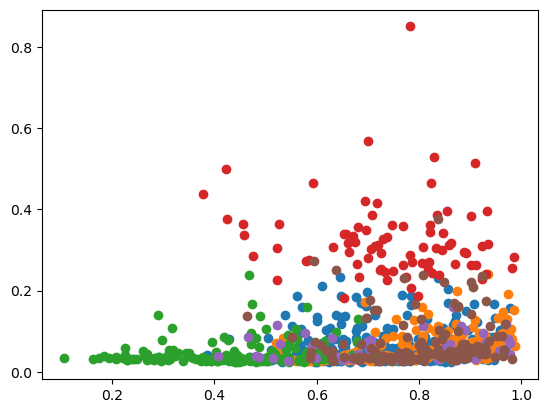

In [38]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df) #same as kmeans.labels_
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 1], df.to_numpy()[row_ix, 3]) #1 and 3 define the index of colums axes to be used for the visualization. But know that all the columns are ploted
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [39]:
clusters = kmeans.predict(df_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    348
1    215
2    171
3     80
4     57
5    129
dtype: int64

Now let's see to which group was assigned every song

In [40]:
df["cluster"] = clusters
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
id,,,,,,,,,,,
1rXrCGNgeUKVjJGczHL5bG,0.714,0.506,-9.549,0.0386,0.38300,0.305000,0.287,0.428,80.486,236533,2
5aUwnYLjQD7OfLMJDWSnsT,0.479,0.967,-2.445,0.0431,0.00697,0.000000,0.217,0.719,134.743,213080,1
60QLLec3yKDwloXCyummPy,0.484,0.905,-3.506,0.0481,0.14600,0.000001,0.240,0.486,125.414,220920,1
5q2qiluA3VVlCJVGG5gYVX,0.496,0.837,-3.682,0.0332,0.06120,0.000000,0.267,0.704,169.995,211533,1
4Jo4w96boe7PArUYEQSyiD,0.662,0.682,-7.833,0.0285,0.17800,0.000232,0.335,0.624,114.067,239240,5
...,...,...,...,...,...,...,...,...,...,...,...
1Q1b8eVkUPGlpSArl8JAVw,0.541,0.459,-10.433,0.0297,0.18900,0.027400,0.099,0.803,171.165,187013,2
1akgiRM3mN2nxu2AX6ACCW,0.713,0.826,-4.075,0.2430,0.08970,0.000000,0.421,0.664,86.444,241933,3
7Fg4jpwpkdkGCvq1rrXnvx,0.479,0.309,-14.751,0.0299,0.15300,0.220000,0.134,0.182,127.155,379213,2


# Saving with pickle

In [52]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("song_recom_scaler.pickle", "wb") as f: 
    pickle.dump(scaler,f) 

with open("song_recom_kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [53]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: #rb in this cas is reading permission
            return pickle.load(f) 
        
    except FileNotFoundError: # if we don't add this error it will give an error and the running will stop
        print("File not found!") 


...

...

# Recommend a song based on customer favorite song

## Input the song and get credendials from spotify

In [77]:
song = input('what is your favorite song:')

what is your favorite song:hello


In [78]:
results = sp.search(q=song,limit=1,market="FR") #top 3 limits and market great britan
results
track_id = results["tracks"]["items"][0]["id"]

## Scaling new song

In [82]:
columns = ["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]

In [86]:
#getting the audio features of the song
track_features = sp.audio_features(track_id)
df_track_features = pd.DataFrame(track_features)
df_track_features=df_track_features[columns]

df_track_features.set_index('id', inplace=True)
display(df_track_features.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
id,,,,,,,,,,
4tnkcZTeZqqjWjwGhZUJcK,0.802,0.839,-4.294,0.0592,0.465,0.000052,0.117,0.861,94.997,194933


In [90]:
columns_no_id = ["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms"]

In [91]:
saved_scaler = load("song_recom_scaler.pickle")
scaled_user_input_song = saved_scaler.transform(df_track_features)
df_scaled_user_input_song = pd.DataFrame(scaled_user_input_song, columns=columns_no_id)
display(df_scaled_user_input_song.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.396402,0.670011,0.828623,-0.240454,1.47023,-0.303547,-0.473396,1.241715,-0.958174,-0.756522


In [ ]:
closest_cluster_label = saved_mode.predict(scaled_user_input_song)

## Output the name of the song the artist and the album

In [ ]:
#results["tracks"]["items"][0]["artists"] # Track artists
#results["tracks"]["items"][0]["id"] # Track ID
#results["tracks"]["items"][0]["name"] # Track name
#results["tracks"]["items"][0]["popularity"] # Popularity index